# Basic test
Tests the basic model defined in the "basic_model.py" file, instantiating bees, hives and resources

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import importlib

from TACABModel.BeeModel import BeeModel
from TACABModel.BeeHive import BeeHive
from TACABModel.Resource import Resource
from TACABModel.Bee import Bee

from tqdm.notebook import tqdm

In [39]:
import matplotlib.pyplot as plt
import numpy as np

## Instantiate model

In [40]:
model = BeeModel(size=5)

# Create a beehive
HIVE = model.create_agent(BeeHive, pos=(0,0))

# Create bee agents
for _ in range(100):
    model.create_agent(Bee, hive=HIVE)
# Resources
model.create_agent(Resource, pos=(-1,-1), radius=-1, distance=650, duration=20, peak=75, sugar_concentration=12.5*650)
model.create_agent(Resource, pos=(-1,-1), radius=-1, distance=650, duration=5, peak=85, sugar_concentration=4.5*650)
model.create_agent(Resource, pos=(-1,-1), radius=-1, distance=650, duration=5, peak=102, sugar_concentration=5*650)

d:\UvA\agent_based_modelling\abm-project\TACABModel\BeeModel.py:25: UserWarning: You are trying to set model.agents. In a next release, this attribute is used by MESA itself so you cannot use it directly anymore.Please adjust your code to use a different attribute name for custom agent storage
  self.agents = []


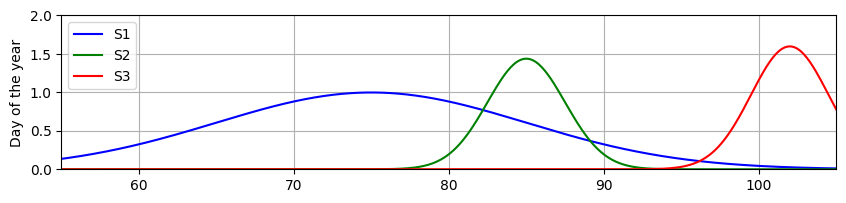

In [41]:
# Plot resource profitability
fig, ax = plt.subplots(figsize=(10,2))
days = np.arange(50, 111, 0.1)

colors = ["blue", "green", "red"]

for (i, c, agent) in zip(range(1,4), colors, model.get_agents_of_type(Resource)):
    profitabilities = agent.profitability(days)
    ax.plot(days, profitabilities, color=c, label=f"S{i}")

ax.grid()
ax.set_xlim(55,105)
ax.set_ylim(0,2)
ax.set_ylabel("Profitability")
ax.set_ylabel("Day of the year")
ax.legend()
plt.show()

104


<Axes: >

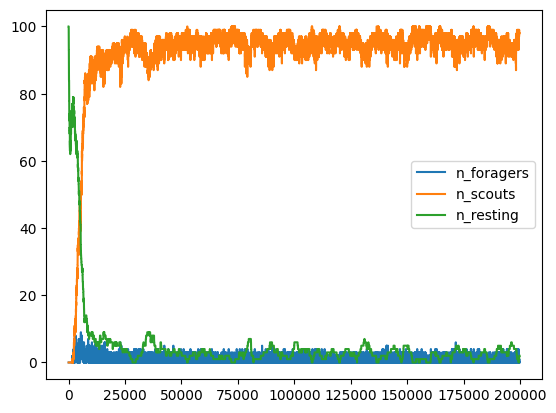

In [47]:
%matplotlib inline

for _ in range(86400):
    model.step()

print(len(model.agents))
data = model.datacollector.get_model_vars_dataframe()
data.plot()

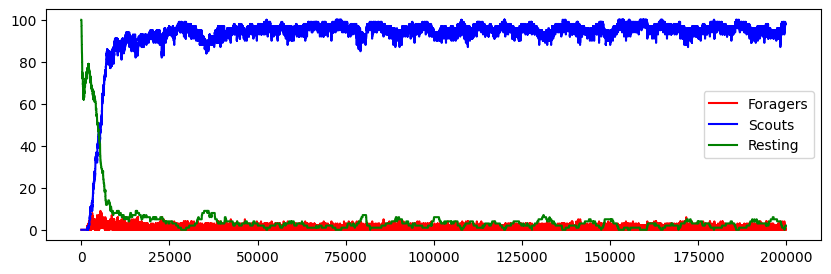

In [65]:
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(data['n_foragers'], color="red")
ax.plot(data['n_scouts'], color="blue")
ax.plot(data['n_resting'], color="green")
ax.legend(labels=["Foragers", "Scouts", "Resting"])
plt.show()

## Plot scenario

In [ ]:
# TODO: A potential starting point 
# https://github.com/projectmesa/mesa-examples/blob/main/examples/boid_flockers/boid_flockers/SimpleContinuousModule.py

In [ ]:
x = [1, 2, 3]

list(filter(lambda i : i < 2, x))

[1]